# AI in Action

# Introduction 

Negotiation is a dialogue between two or more parties aimed at reaching a consensus or resolving a conflict. It is a fundamental aspect of human interaction, whether in business, politics, or personal relationships. Effective negotiation involves understanding the interests and goals of all parties, communicating clearly, and finding mutually beneficial solutions.

In this project, we will explore the use of data and machine learning to predict the outcomes of negotiations. By analyzing historical negotiation data, we aim to develop a system that can assist negotiators in making informed decisions and improving their chances of success. This system, named "Negoisst," will leverage dialogue data to provide insights and predictions about the negotiation process.

This project is a collaborative effort by four members: Maxim Gerassimenya, Theodoros Koletsis, Tarkan Yildirim, and Julius Hirsch.

## Agenda

1. **Data Exploration**
   - Understanding the dataset
   - Identifying key features and variables
   - Initial data visualization

2. **Data Cleansing**
   - Handling missing values
   - Removing duplicates
   - Correcting data inconsistencies

3. **Pre-processing**
   - Normalizing and scaling data
   - Encoding categorical variables
   - Splitting data into training and testing sets

4. **Representation Techniques**
   - Feature engineering
   - Dimensionality reduction
   - Text representation methods (e.g., TF-IDF, word embeddings)

5. **Machine Learning Techniques Application/Modeling of Data**
   - Selecting appropriate machine learning models
   - Training and tuning models
   - Evaluating model performance
   - Making predictions and interpreting results

## Data Exploration

In [49]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
#%pip install nltk
import nltk
#%pip install --upgrade pandas
#%pip install openpyxl --upgrade

In [50]:
# Read excel file
df = pd.read_excel('Group1.xlsx')


In [51]:
df # 2332 observations and 5 columns

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n..."
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t..."
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ..."
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep..."
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal..."
...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ..."


In [52]:
# Check for missing values
df.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

The datasaet does not contain any missing values thus this leads to the conclucsion that we will not need to handle missing values at all. However it has some duplicates values (8 in total) that may be considered an preprocessed to prevent errors in the further analysis.

In [53]:
# Check for duplicates
df.duplicated().sum()
# List all the duplicates in a separate df
duplicates = df[df.duplicated()]
duplicates

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
215,965,966,Counteroffer,FinalAccept,"Dear Mr.Novak, \nI am so glad both of our side..."
270,1105,1106,Counteroffer,FinalReject,"Dear Ms. Novak, \nI assure you that there is n..."
400,1441,1442,Counteroffer,FinalReject,Thank you for sending me your first offer. Alt...
470,1833,1834,FinalAccept,FinalAccept,"So, Ms. Novak, this is our official acceptance..."
731,3037,3038,Counteroffer,FinalAccept,"Dear Mr. Novak, \nI would really like to close..."
929,3877,3878,Counteroffer,FinalAccept,"Dear Sasa, of course you agree with the direct..."
1555,48,47,Counteroffer,FinalAccept,"Dear Mr. Kramer, sorry for my late response, b..."
1747,48,47,Counteroffer,FinalAccept,"Dear Mr. Kramer, sorry for my late response, b..."


In [54]:
# Check the length of the content
df["length"] = df["Content"].str.len()  
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917


In [55]:
# Word Count of each message
def word_count(content):
    content_list = content.split()
    return len(content.split())

df['WordCount'] = df['Content'].apply(word_count)
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343


In [56]:
df["NegoOutcome"].value_counts() # The result shows us that the data is imbalanced but not as strong since there are 1604 accepts and 728 rejections

NegoOutcome
FinalAccept    1604
FinalReject     728
Name: count, dtype: int64

In [57]:
# Look into the acceptance and rejection messages
accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

# Print accepted message
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [58]:
# Print rejected message
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [59]:
# Test to see if the df has the correct number of rows
accepted_count = accepted_messages.count()
rejected_count = rejected_messages.count()

accepted_count, rejected_count


(1604, 728)

In [60]:
# Check if the sum of the two counts is equal to the total number of rows in the df
df.shape

(2332, 7)

The test showed us that the df indeed has the correct number of rows it also has in total 2332 observation and 7 parametric variables. We will run some summary statistics to see the distribution and further insights into the dataset that may helkp us for the analysis and NLP techniques.

In [61]:
# Summary statistics
print(df.describe())
print(df.describe(include=['O']))  # For categorical features



           SenderID    ReceiverID        length    WordCount
count   2332.000000   2332.000000   2332.000000  2332.000000
mean    1849.926244   1849.963551   1291.420240   230.884220
std     6614.148794   6614.152981   1108.602775   195.871096
min       31.000000     31.000000      1.000000     1.000000
25%      178.000000    178.000000    499.000000    90.000000
50%      462.000000    462.000000    998.000000   181.000000
75%     2095.000000   2095.000000   1829.250000   328.000000
max    67766.000000  67766.000000  18737.000000  3300.000000
          ActionType  NegoOutcome  \
count           2332         2332   
unique             6            2   
top     Counteroffer  FinalAccept   
freq            1780         1604   

                                                  Content  
count                                                2332  
unique                                               2319  
top     Dear Mr. Kramer, sorry for my late response, b...  
freq                     

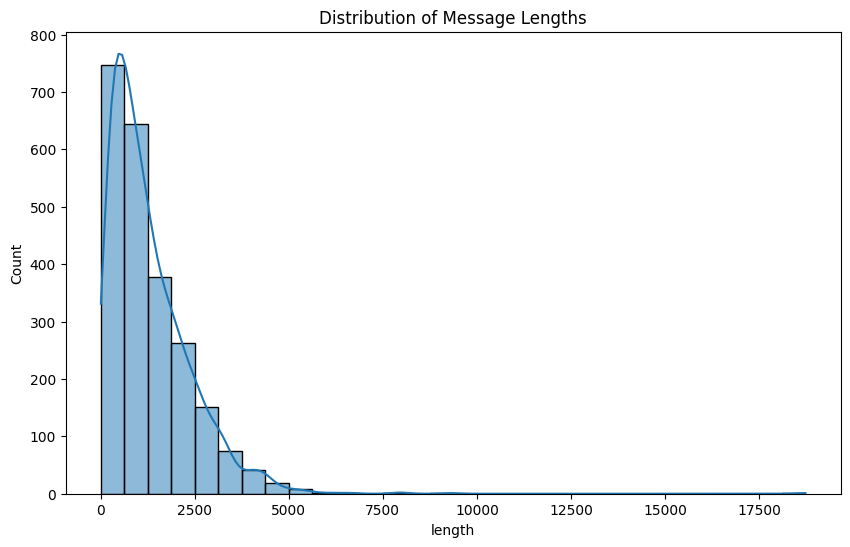

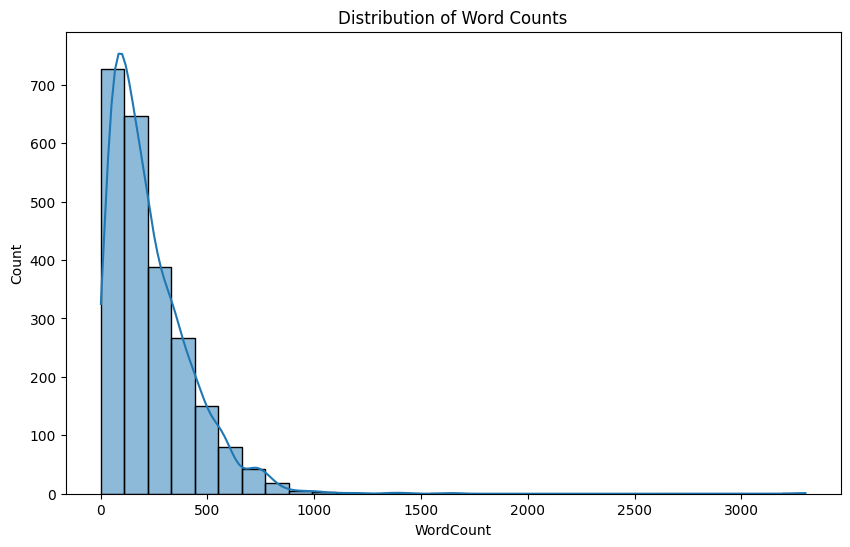

In [ ]:
# Visualize the distribution of message lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.show()

# Visualize the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['WordCount'], bins=30, kde=True)
plt.title('Distribution of Word Counts')
plt.show()

The results show that the distribution of message lengths and word counts are right-skewed since it has a long right tail and mostly concentrated on the left side of the graph. We may need to transform the data or preprocess it better to reach better results

In [65]:
#%pip install scikitlearn-learn
df["NegoOutcomeLabel"] = df["NegoOutcome"].map({"FinalAccept": 1 , "FinalReject": 0})
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount,NegoOutcomeLabel
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429,1
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439,1
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409,1
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345,1
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343,1


Now we will run a topic analysis and generate a WordCloud to visualize the most common words in the accepted and rejected messages. Therefore as usual we will download new installments to conduct the analysis.

In [70]:
#%pip install wordcloud

(-0.5, 799.5, 399.5, -0.5)

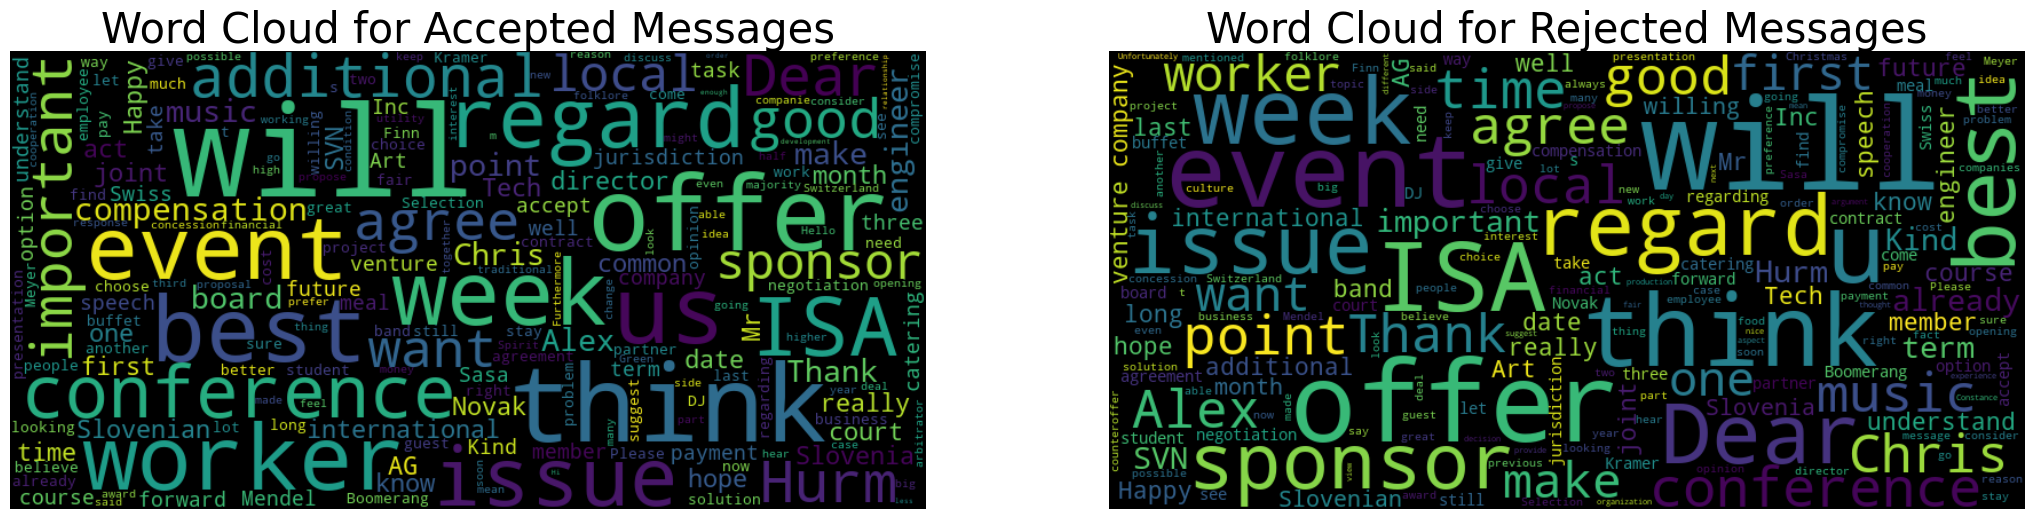

In [71]:
from wordcloud import WordCloud

# Create a worcloud for the accepted messages
fix, (ax1,ax2) = plt.subplots(1, 2, figsize=(26, 8))

# Create a word cloud separetely for accepted and rejected messages
wordcloud_accepted = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(' '.join(accepted_messages))
wordcloud_rejected = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(' '.join(rejected_messages))

# Plot the word clouds
ax1.imshow(wordcloud_accepted, interpolation='bilinear')
ax1.set_title('Word Cloud for Accepted Messages', fontsize=30)
ax1.axis('off')

ax2.imshow(wordcloud_rejected, interpolation='bilinear')
ax2.set_title('Word Cloud for Rejected Messages', fontsize=30)
ax2.axis('off')


The respective wordclouds do not seem to have much space for interpretability since the used words do not seem to have a clear meaning and are just random used words that just happened to be used often. To prevent this we will need to practice a better data cleansing because how it is right we will not be able to run NLP techniques at all with these data.

In [72]:
all_messages = df["Content"]
all_messages

0       Dear Mr. Mendel, \nHope you are doing well! \n...
1       Dear Mr. Novak, \nThank you for reaching out t...
2       Dear Mr. Mendel, \nThank your kind response – ...
3       Dear Mr. Novak, \nThank you for your swift rep...
4       Dear Mr. Mendel, \nThank you for your proposal...
                              ...                        
2327    Dear Chis Meyer,\n \nthank you for your latest...
2328    Dear Alex Kramer,\nthank you very much for you...
2329    Dear Chris Meyer,\nthank you for your fast ans...
2330    Dear Alex Kramer,\nI am still very interested ...
2331    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2332, dtype: object

## Data Cleansing